# First Load the Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import nltk
import matplotlib.pyplot as plt
import matplotlib.patches
from scipy import stats
import seaborn as sns
plt.style.use('ggplot')

In [2]:
textfile =  '/Users/dhalteh/Desktop//yelp_labelled.txt'

# Context and Description of the Data

The data we selected explores a set of 1000 Yelp consumer reviews, 500 of which are pre-labeled as "positive" sentiments, while the remaining 500 being labeled as "negative" sentiments. According to UC Irvine's Machine Learning Reposirity (from which we extracted the data), this particular dataset was orginally collected in 2015 for Dimitrios Kotzias' publication: 'From Group to Individual Labels using Deep Features'. The data was selecively chosen from a larger Yelp dataset such that each sentence has a distinct positive or negative connotation, thus deeming a binary Sentiment label appropriate. 

Given that this dataset of Yelp review was selectively chosen to conform to either a positive or negative Sentiment bin, one must be careful to not apply our findings to other Yelp-based review sets that contain a significant portion of reviews with ambiguous associated Sentiments. Nevertheless, given the nature of our data at hand, we can proceed with our analysis for the purposes of binary Sentiment classification. 

As we read in the text file with the Yelp reviews and pre-labled Sentiments, our first step is to store the file as a Pandas DataFrame with the columns titled as 'Review' and 'Sentiment'. This step will make our EDA portion of the project much simpler, and will increase the data's overall usability.

Our 'Review' column will simply be the character string values comprised of Yelp reviews of individual restaurants or other stores and shops that various customers visited.

There will also be a 'Sentiment' column that contains either values of 0 or 1. These values will indicate the sentiment in which the review was written. More specifically, a value of 0 corresponds to negative sentiment, while a value of 1 corresponds to positive sentiment.

In [3]:
data = pd.read_table(textfile)
header = ["Review", "Sentiment"]

In [4]:
data.shape

(1000, 2)

As shown above, the shape of the data is as expected. We have 1000 observations (500 positive and 500 negative), and two features: 
- 1) The review itself
- 2) Its associated sentiment.

In [5]:
data.head(25)

,Review,Sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


Looking at the first 25 observations of our dataset, we can see the various different reviews list on the left, with their corresponding sentiment on the righthand side. We performed this step to ensure that the response (Sentiment) is coded in a manner such that '0' represents negative sentiments, while '1' does indeed respresnt positive sentiments.

## Is there a difference between the length of reviews for the reviews with positive sentiment in comparison to the reviews with negative sentiment?

Here we are performing some basic feature engineering to determine the length of reviews by measuring their respective word and character counts. 

In [6]:
data['LengthOfReview'] = data['Review'].apply(lambda x: len(x.split()))
data['LengthOfReview'].head()

0     4
1     4
2     8
3    15
4    12
Name: LengthOfReview, dtype: int64

In [7]:
data['Character_Count'] = data['Review'].apply(len)
data['Character_Count'].head() 
# Here we can see the character counts of the reviews

0    24
1    18
2    41
3    87
4    59
Name: Character_Count, dtype: int64

In [8]:
data.head()

,Review,Sentiment,LengthOfReview,Character_Count
0,Wow... Loved this place.,1,4,24
1,Crust is not good.,0,4,18
2,Not tasty and the texture was just nasty.,0,8,41
3,Stopped by during the late May bank holiday of...,1,15,87
4,The selection on the menu was great and so wer...,1,12,59


In [9]:
positive = data.loc[data.Sentiment == 1]
negative = data.loc[data.Sentiment == 0]

### Positive Reviews

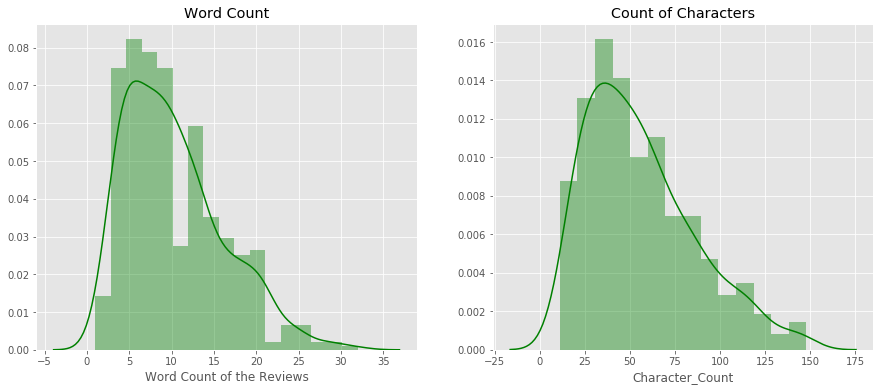

In [10]:
fig, ax = plt.subplots(1, 2, figsize = [15, 6])
sns.distplot(positive.LengthOfReview, label = "Positive Sentiment Words", 
                      axlabel = "Word Count of the Reviews", color = 'g', ax = ax[0]).set_title('Word Count')
sns.distplot(positive.Character_Count, label = "Positive Sentiment Characters", 
                      axlabel = "Character_Count", color = 'g', ax = ax[1]).set_title('Count of Characters')
plt.show()

In [11]:
positive.describe()

,Sentiment,LengthOfReview,Character_Count
count,500.0,500.000000,500.00000
mean,1.0,10.290000,55.88200
std,0.0,5.831459,30.22839
min,1.0,1.000000,11.00000
25%,1.0,6.000000,32.75000
50%,1.0,9.000000,49.50000
75%,1.0,13.250000,73.25000
max,1.0,32.000000,148.00000


For positive reviews, we can see that both the Word Count and Character Count variables follow a right-skewed unimodal distribution. The summary statistics table above tells us that the average number of words per positive review approaches six, while the average number of characters is around 56. 

### Negative Reviews

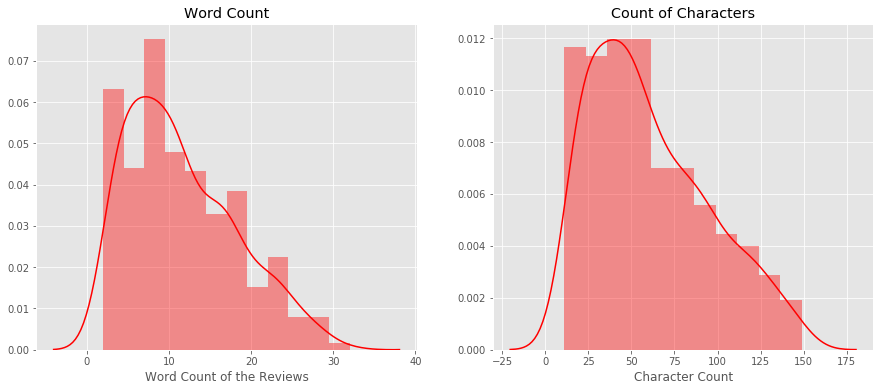

In [12]:
fig, ax = plt.subplots(1, 2, figsize = [15, 6])
sns.distplot(negative.LengthOfReview, label = "Negative Sentiment Words", 
                      axlabel = "Word Count of the Reviews", color = 'r', ax = ax[0]).set_title('Word Count')
sns.distplot(negative.Character_Count, label = "Negative Sentiment Characters", 
                      axlabel = "Character Count", color = 'r', ax = ax[1]).set_title('Count of Characters')
plt.show()

In [13]:
negative.describe()

,Sentiment,LengthOfReview,Character_Count
count,500.0,500.000000,500.000000
mean,0.0,11.498000,60.750000
std,0.0,6.611916,34.224935
min,0.0,2.000000,11.000000
25%,0.0,6.000000,33.000000
50%,0.0,10.000000,52.500000
75%,0.0,16.000000,84.000000
max,0.0,32.000000,149.000000


For the negative reviews, we once again see that our distributions of Word Counts and Character Counts follow a right-skewed unimodal distribution. Further, the average number of words per negative review is approximately 11, while the average number of characters per negative review is around 61. 

Looking at our EDA of the two distributions for Length of Review for both positive and negative sentiments, we can see that there are some similarities, but there are also some differences. To further investigate and understand how the distributions differ from one another, we proceed with our EDA below. 

### Negative Vs. Positive ( Length of Review )

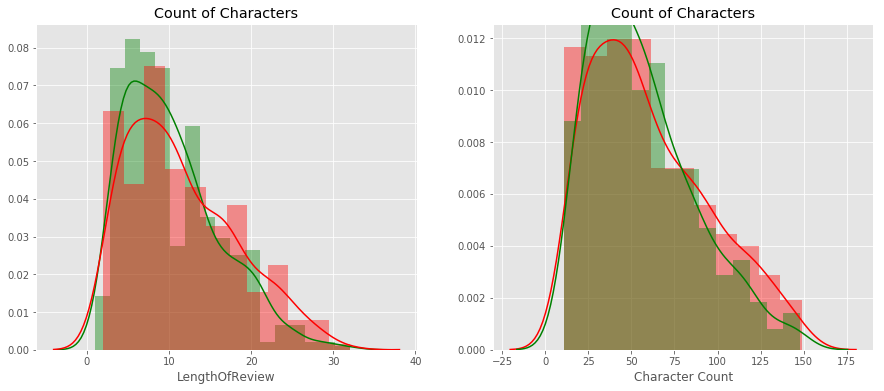

In [14]:
fig, ax = plt.subplots(1, 2, figsize = [15, 6])
sns.distplot(positive.LengthOfReview, label = "Positive Sentiment", 
             axlabel = "Word Count of the Reviews", color = 'g', ax = ax[0]).set_title('Count of Characters')
sns.distplot(negative.LengthOfReview, color = 'r', ax = ax[0])
sns.distplot(negative.Character_Count, label = "Negative Sentiment Characters", 
                      axlabel = "Character Count", color = 'r', ax = ax[1]).set_title('Count of Characters')
sns.distplot(positive.Character_Count, label = "Positive Sentiment Characters", 
                      axlabel = "Character Count", color = 'g', ax = ax[1]).set_title('Count of Characters')
plt.show()

While the means of Review Length (Length: 10.29, 11.49) and Character Count (Count: 55.88, 60.75) are quite similar for both positive and negative reviews, we notice that the distributions for negative reviews do tend to be more heavily right-skewed. In contrast, the distributions of Review Length and Character Count for positive reviews have higher frequencies at or around the mean values. 

# Is there a punctuational difference between the two Sentiments?

Depending on how great or how poor an individuals experience was at a restaurant, there will surely be differences in the context of the reviews. While our model and much of our analysis is focusing on these aforementioned contextual meanings, some of differences can also be attributed to a variation in grammatical/punctuational usage. 

For example, someone who is enraged over the service they received may want to TYPE THEIR REVIEW IN ALL CAPS. In contrast, someone who is delighted by their service/experience may choose to display their sentiments by using some other form of punctuation, or possibly even none at all. 

To gain some insight on the use of this type of stylistic meaning, we explore the creation of additional feature variables that help us quantify their prevalance in our review data. 

In [15]:
data['Punctuation'] = data['Review'].apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
data.head()

,Review,Sentiment,LengthOfReview,Character_Count,Punctuation
0,Wow... Loved this place.,1,4,24,2
1,Crust is not good.,0,4,18,1
2,Not tasty and the texture was just nasty.,0,8,41,1
3,Stopped by during the late May bank holiday of...,1,15,87,4
4,The selection on the menu was great and so wer...,1,12,59,1


The variable created above counts the number of punctuation characters in each review.

In [16]:
data['Upper_Case'] = data['Review'].apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))
# How many words in each review are in all capital letters?
data.head()

,Review,Sentiment,LengthOfReview,Character_Count,Punctuation,Upper_Case
0,Wow... Loved this place.,1,4,24,2,0
1,Crust is not good.,0,4,18,1,0
2,Not tasty and the texture was just nasty.,0,8,41,1,0
3,Stopped by during the late May bank holiday of...,1,15,87,4,0
4,The selection on the menu was great and so wer...,1,12,59,1,0


The variable created above counts the number of capitalized characters in each review.

### Negative Vs. Positive (Punctuation Inclusion and Upper Case Word Count )

In [17]:
positive = data.loc[data.Sentiment == 1]
negative = data.loc[data.Sentiment == 0]

## Punctuational Differences

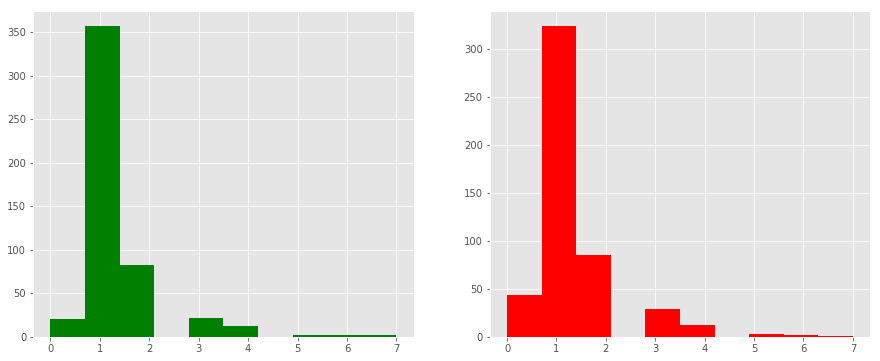

In [18]:
fig, axs = plt.subplots(1, 2, figsize = [15, 6], sharey=False)
axs[0].hist(positive.Punctuation, color = 'g') #positive
axs[1].hist(negative.Punctuation, color = 'r') #negative
plt.show()

The plots above detail the Punctuation counts of both Positive (left) and Negative (right) reviews. With the exception of a few slightly differing bins, the frequency of punctuation appears to be fairly consistent across both the Positive and Negative subsets.

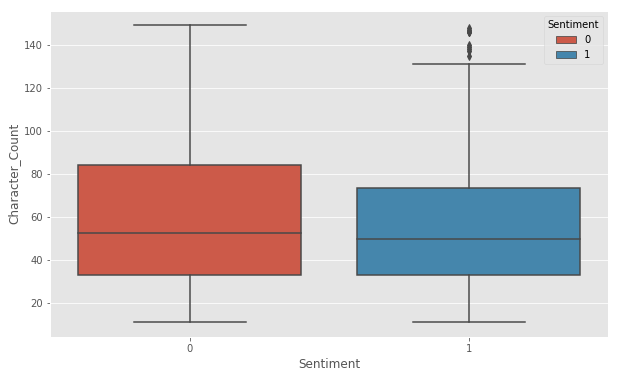

In [19]:
fig, ax = plt.subplots(1, 1, figsize = [10, 6])
visual = sns.boxplot(x="Sentiment", y="Character_Count", hue = 'Sentiment', data=data, dodge=False).legend(title = 'Sentiment')
plt.show()

Similarly, we don't see too much of a difference in the boxplots of the means of character counts between both the Positive and Negative reviews. As such, we don't believe the punctuation feature will be worth adding to our final model.

# Splitting our Data

In [20]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

We will attempt to predict the sentiment of Reviews by the different words, combination of words, and characters that each review has. In order to gain a more consistent measurement of our Accuracy rate, we first split the data into two parts: 'training' and 'testing'. The observations that randomly get assigned to training will keep their label (Sentiment value) so we can understand how the patterns align (denoting the Supervised aspect of our model). For the observations that do not get randomly assigned to the training dataset, they will be placed in the testing dataset with their labels removed. While we will be removing the testing datasets labels, we will not be throwing out the labels completely. Rather, the excluded Sentiment labels will be stored and later used for assessing the both the performance and accuracy of our predictive model.

In [21]:
train, test = train_test_split(data, test_size = 0.25)
# 25% of our data was placed into the test set in order to measure the performance later on. 

Next, we proceed to by subsetting the training Reviews by their respective Sentiment values, resulting in two training subsets: Positive and Negative.

### Positive Training Labels

In [22]:
pos_train = train.loc[train.Sentiment == 1].Review

In [23]:
pos_train.head()

294    I didn't know pulled pork could be soooo delic...
624                                Pretty awesome place.
54                                 The portion was huge!
529                         The bartender was also nice.
246                 Seriously flavorful delights, folks.
Name: Review, dtype: object

In [24]:
pos_train.shape
# There are 381 positive sentiment observations in our training set. 

(391,)

Now that our positive sentiment observations in the training set have been stored into "pos_train", we can perform the same extraction process on the negative sentiment reviews from our training data.

In [25]:
neg_train = train.loc[train.Sentiment == 0].Review

In [26]:
neg_train.head()

883    I ordered Albondigas soup - which was just war...
770    My sashimi was poor quality being soggy and ta...
218             Which are small and not worth the price.
555    I know this is not like the other restaurants ...
487    I dont think I will be back for a very long time.
Name: Review, dtype: object

In [27]:
neg_train.shape
# There are 378 negative sentiment observations in our trainging set.

(359,)

We will now make use of Python's wordlclouds for further EDA. First we define a function called "wordcloud_draw" that we will use to generate the wordcloud itself. Within the "wordcould_draw" function, our most important step is cleaning the words such that only words in our desired format will be processed. In the context of our Yelp review data, many of the reviews in the dataset begin with non-alphabetic characters such as the hashtag or dollar sign. By cleaning our words of such characters, we can limit our EDA to certain feature words that will give us the most insight into our data.

In [28]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and not word.startswith('-')
                                and not word.startswith('!')
                                and not word.startswith('*')
                                and not word.startswith('$')
                                and not word.startswith('.')
                                and not word.startswith(',')
                                and not word.startswith('/')
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

Positive words


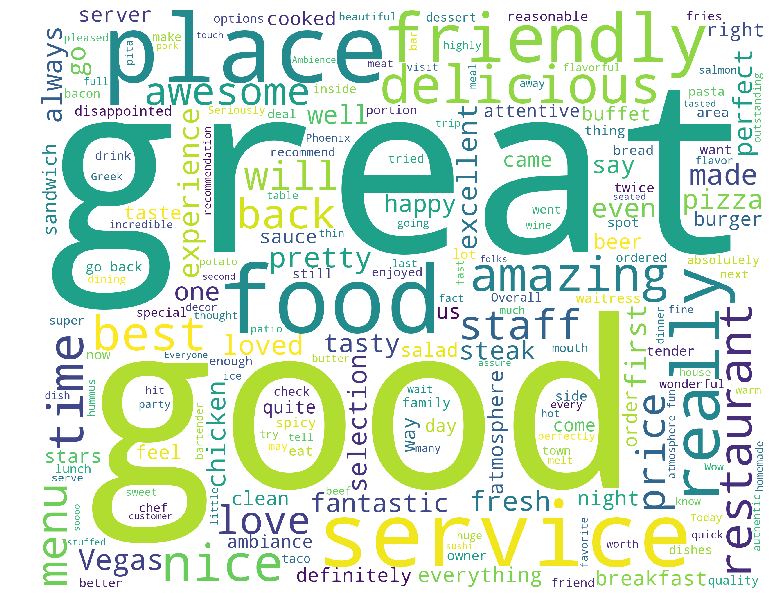

In [29]:
print("Positive words")
wordcloud_draw(pos_train, 'white')

Negative words


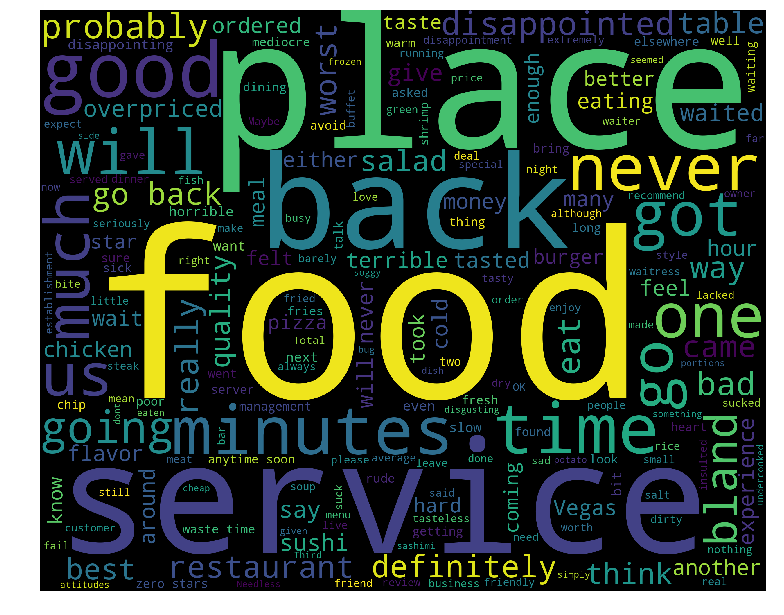

In [30]:
print("Negative words")
wordcloud_draw(neg_train)

# Cleaning the Data

While the wordclouds generated above are quite trendy and colorful, they do give us quite of a bit of insight in terms of the relative frequency of words, as well as how that frequency may differ depending on the associated sentiment value of the review from which it was extracted.

Upon looking at the wordclouds themselves, we can see that certain words (although not necessarily the most frequent) do not necessarily give us much information regarding the sentiment of their respective review. As such, we seek to remove these aforementioned unimportant words.

One common method of removing such words is to use NLTK's built-in "stopwords" list, which is a list of common stopwords. Stopwords are definied as words whose definitions do not bring importance to their parent text's meaning, thus deeming the process of sentiment differentiation a more difficult and ambiguous process than necessary.

By removing these words, we can proceed with our token generation process with a mind of ease.

In [31]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
nltk.download('punkt')
from collections import Counter

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dhalteh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/dhalteh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [32]:
pos_train

294    I didn't know pulled pork could be soooo delic...
624                                Pretty awesome place.
54                                 The portion was huge!
529                         The bartender was also nice.
246                 Seriously flavorful delights, folks.
737    Try them in the airport to experience some tas...
310                                      Fantastic food!
335                              Great service and food.
395    To summarize... the food was incredible, nay, ...
503                         The ambiance was incredible.
411                Come hungry, leave happy and stuffed!
787    I don't have very many words to say about this...
239    Everyone is very attentive, providing excellen...
361    This is an Outstanding little restaurant with ...
91     It's like a really sexy party in your mouth, w...
524                          Those burgers were amazing.
834                                 They were excellent.
150    My fiancé and I came in 

### Tokenize

In [33]:
from nltk.tokenize import RegexpTokenizer

In [34]:
regTokenizer = RegexpTokenizer(r'\w{3,}')
# Now we will make all of them lowercase
data['Tokenized'] = data['Review'].apply(lambda x: x.lower())

# Now we can tokenize our data.
data['Tokenized'] = data['Review'].apply(lambda x: regTokenizer.tokenize(x))

In [35]:
# Let's check now to see that it correctly tokenized our data. 
data.head()

,Review,Sentiment,LengthOfReview,Character_Count,Punctuation,Upper_Case,Tokenized
0,Wow... Loved this place.,1,4,24,2,0,"[Wow, Loved, this, place]"
1,Crust is not good.,0,4,18,1,0,"[Crust, not, good]"
2,Not tasty and the texture was just nasty.,0,8,41,1,0,"[Not, tasty, and, the, texture, was, just, nasty]"
3,Stopped by during the late May bank holiday of...,1,15,87,4,0,"[Stopped, during, the, late, May, bank, holida..."
4,The selection on the menu was great and so wer...,1,12,59,1,0,"[The, selection, the, menu, was, great, and, w..."


### Part-of-Speech Tagging and Removal

Now, we before we perform any type of stop word removal, we must perform Part-Of-Speech tagging which is also known as "POS tagging" or "POS removal". POS-tagging is used in order to maintain the context of the words by looking at the adjacent words in order to further understand the meaning of the text.

POS-tagging is supposed to be done before stop word removal. Often, stop words can contain valuable information when combined with the important word that they are adjacent to.

In [36]:
# POS Tag
data['POSR'] = data['Tokenized'].apply(lambda x: nltk.pos_tag(x))
# We will keep the original non POS removal ones alone

In [37]:
part_of_speech = {}
for s in data['POSR']:
    for p in s:
        if p[1] in part_of_speech:
            part_of_speech[p[1]].add(p[0])
        else:
            part_of_speech.update({p[1]: set(p[0])})

# Distribution of the POS distribution

# Pie Chart
short = part_of_speech.values()
xl = []
for x in short:
    xl.append(len(x))
labs = part_of_speech.keys()

# Create a list of the labels
labs_list = list()
for i in part_of_speech.keys():
    labs_list.append(i)
    
labs_list

pos_df = pd.DataFrame({'Tags':labs_list, 'Frequency':xl})
pos_df = pos_df.sort_values('Frequency', ascending = False)
pos_df = pos_df.head(10)
# We will only keep the top 10 tags for visualization, because the frequency of the others is too small and would 
# make our plot much more difficult to interpret.
pos_df

,Frequency,Tags
3,737,NN
5,395,JJ
0,303,NNP
8,213,NNS
4,188,RB
14,141,VBN
1,135,VBD
13,126,VB
9,102,VBG
10,90,VBP


Text(0.5,1,'Part of Speech Distribution')

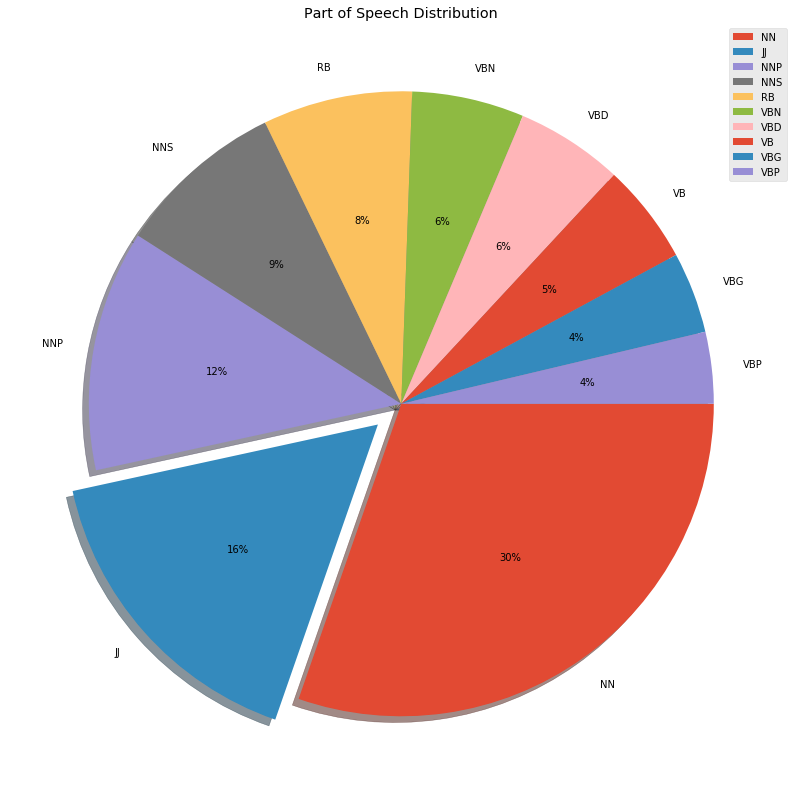

In [38]:
plt.figure(figsize=[14, 14])
plt.style.use('ggplot')
plt.axis("equal")

labels = list(pos_df.Tags)

explode = (0, 0.1, 0, 0, 0, 0, 0, 0, 0, 0)

plt.pie(pos_df.Frequency, labels = pos_df.Tags, autopct='%1.0f%%', explode = explode, counterclock=False, shadow=True)
plt.legend(labels)
plt.title("Part of Speech Distribution")

Here we can see the most common Part-Of-Speech tags in our pie chart. These most common tags could possibly give us some insight into what sentiment that they may be associated with. 

In [39]:
data.head()

,Review,Sentiment,LengthOfReview,Character_Count,Punctuation,Upper_Case,Tokenized,POSR
0,Wow... Loved this place.,1,4,24,2,0,"[Wow, Loved, this, place]","[(Wow, NNP), (Loved, VBD), (this, DT), (place,..."
1,Crust is not good.,0,4,18,1,0,"[Crust, not, good]","[(Crust, NNP), (not, RB), (good, JJ)]"
2,Not tasty and the texture was just nasty.,0,8,41,1,0,"[Not, tasty, and, the, texture, was, just, nasty]","[(Not, RB), (tasty, JJ), (and, CC), (the, DT),..."
3,Stopped by during the late May bank holiday of...,1,15,87,4,0,"[Stopped, during, the, late, May, bank, holida...","[(Stopped, NNP), (during, IN), (the, DT), (lat..."
4,The selection on the menu was great and so wer...,1,12,59,1,0,"[The, selection, the, menu, was, great, and, w...","[(The, DT), (selection, NN), (the, DT), (menu,..."


We can see in the POSR column that there are some combinations of letters, next to words that we may not be familiar with such as "NN" or "VBD". These are the Part-of-Speech tags. They tell us and give us more information about the context of the words themselves. 



# Training the Model

To perform our predictive modeling, we chose to use Logistic Regression as our model of choice. Given our binary output of Negative and Positive Sentiments, we felt Logistic Regression would be an appropriate choice. 

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from nltk.stem.porter import PorterStemmer

The Count Vectorizer here transforms our word counts into a vectorized format. By transforming our words into a feature vector, we are essentially treating each unique word in our vocabulary as a separate feature variable. 

In [41]:
word_vectorizer = CountVectorizer(analyzer = 'word', lowercase = False) 

feats = word_vectorizer.fit_transform(data.Review.values)

features_nd = feats.toarray()
features_nd

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

To ensure that our model is not over-fitting our features, we perform a Cross-Validation using the Validation Set Approach, with a 4/1 training-testing ratio.

In [42]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_nd, data.Sentiment,
                                                   train_size = 0.80, random_state = 1234)

/Users/dhalteh/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [43]:
from sklearn.linear_model import LogisticRegression
logistic_mod = LogisticRegression()

In [44]:
logistic_mod = logistic_mod.fit(X = X_train, y = y_train)
logistic_mod

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [45]:
y_pred = logistic_mod.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.78


Our metric of choice is the Accuracy Score (displayed above), which calculates the percent of testing observations that our model correctly predicted. In this case, our accuracy is 78%.

For future improvement of our model, we can consider the implementation of part of speech tagging as an additional layer to our feature variables.